In [1]:
import main
import beacon

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import pylab as pl
from sklearn import preprocessing

In [2]:
#    num(total validators) = 111
#    p(honest validators proportion): 2/3
#    t(time when the honest validators seeking to vote) = 0.5
#    t(time when the dishonest validators who are "aiming" a smoke cloud) = 0.5
#    epsilon(bound of error) = 0.1
#    a(time latency) = 0.3
boo = beacon.Faction.HonestFaction(74, "Honest", 0.5, 0.1, 0.3)
poo = beacon.Faction.SmokeFaction(37, "Dishonest", 0.5, 0.1, 0.3)

In [3]:
def plot_game_ratio():
    """
    This function calculates the ratio of 0s and 1s in one game and draws the scatter plot
    """
    
    game = beacon.play(boo, poo)
    
    numberZeros = 0
    ratioZeros = 0
    ratioZeros_list = []
    for n in range(len(game)):
        if game[n][2] == 0:
            numberZeros += 1
        ratioZeros = numberZeros/(n+1)
        ratioZeros_list.append(ratioZeros)
    ratioOnes_list = [1-item for item in ratioZeros_list]
    
    plt.plot(range(111), np.ravel(ratioZeros_list), 'o', color = 'red')
    plt.plot(range(111), np.ravel(ratioOnes_list), 'o', color = 'blue')
    plt.ylabel('ratio')
    plt.xlabel('Number of votes')
    plt.title('The ratio for number of 0s and the ratio for number of 1s in one game')
    plt.legend(('0', '1'))
    
    plt.show()    

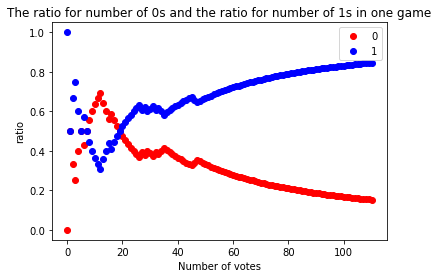

In [36]:
#plot_game_ratio()

In [6]:
#As you can see, the ratio for number of 0s and the ratio for number of 1s generally will increase or decrease
#monotonically after some number of votes. It makes sense since the honest validators will always attest the target 
#with the most number of votes

In [4]:
def plot_win_lose(n_simulations):
    """
    parameters: the number of games simulated
    
    This function calculates the number of wins and loses in n simulated games and draws the bar plot
    """
    stats = [main.collect_statistics(beacon.play(boo, poo)) for _ in range(n_simulations)]
    
    wins = 0
    for s in stats:
        if s[0] / (s[1]+s[0]) >= 2/3 or s[1] / (s[0]+s[1]) >= 2/3:
            wins += 1
        
    result = ('Win', 'Lose')
    y_pos = np.arange(len(result))
    performance = [wins, len(stats)-wins]
    
    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.text(-0.05, len(stats)/2, wins)
    plt.text(0.95, len(stats)/2, len(stats)-wins)
    plt.xticks(y_pos, result)
    plt.ylabel('Result')
    plt.title('Number of Win & Lose for n simulated games')
    plt.show()
    
    
    return performance

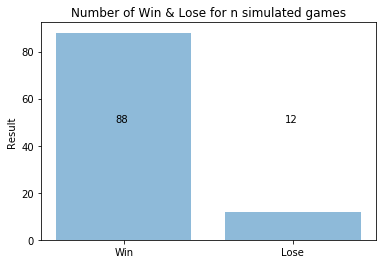

[88, 12]

In [38]:
#plot_win_lose(100)

In [39]:
#next we are going to explore the ratio of winning and losing, to see if there is any pattern
def win_lose_ratio(n_simulations, n_ratio_compared):
    """
    parameters:
        n_simulations: The number of games simulated to obtain one ratio value
        n_ratio_compared: The number of ratio values
        
    This function calculates the ratio of wins and loses in n_simulations games, 
    then append each ratio (total of n_ratio_compared ratios) to the list
    """
    ratio_list = []
    
    for n in range(n_ratio_compared):
        ratio = 0
        stats = [main.collect_statistics(beacon.play(boo, poo)) for _ in range(n_simulations)]

        wins = 0
        for s in stats:
            if s[0] / (s[1]+s[0]) >= 2/3 or s[1] / (s[0]+s[1]) >= 2/3:
                wins += 1

        ratio = wins/len(stats)
        ratio_list.append(ratio)
    
    return ratio_list

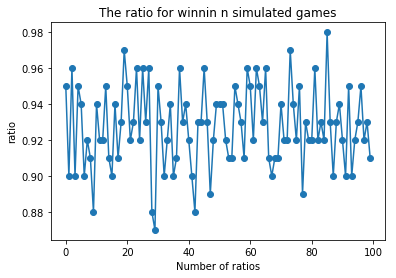

In [40]:
#the plot of 100 ratios of 100 simulated games
win_lose_ratio = win_lose_ratio(100, 100)
plt.plot(win_lose_ratio, 'o-')
plt.ylabel('ratio')
plt.xlabel('Number of ratios')
plt.title('The ratio for winnin n simulated games')
plt.show()

In [41]:
#Through the example above, we have obtained 100 win/lose ratios of 100 simulated games 
#(so each ratio is calculated by the data from 100 simulated games)
#There is no significant pattern except most of the ratios are centered around 0.93
#we can calculate the basic stats
ratio_df = pd.DataFrame(win_lose_ratio)
ratio_df.columns = ['win']
ratio_df.describe()

,win
count,100.000000
mean,0.927300
std,0.022512
min,0.870000
25%,0.910000
50%,0.930000
75%,0.940000
max,0.980000


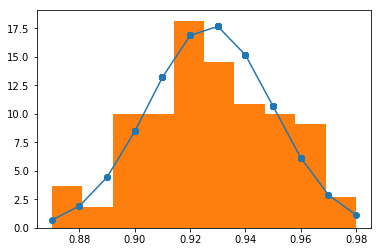

In [42]:
#lets make a gaussian graph
win_lose_ratio_sorted = sorted(win_lose_ratio)

#norm = [float(i)/sum(win_lose_ratio_sorted) for i in win_lose_ratio_sorted]

fit = st.norm.pdf(win_lose_ratio_sorted, np.mean(win_lose_ratio_sorted), np.std(win_lose_ratio_sorted))  #this is a fitting indeed

pl.plot(win_lose_ratio_sorted,fit,'-o')

pl.hist(win_lose_ratio_sorted,normed=True)      #use this to draw histogram of your data

pl.show()               

In [43]:
#we can calculate the 95% confidence interval by using the scipy.stats.interval function
st.t.interval(0.95, len(win_lose_ratio)-1, loc=np.mean(win_lose_ratio), scale=st.sem(win_lose_ratio))

(0.9228331852972921, 0.931766814702708)

In [44]:
#or we can do it manually
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [45]:
mean_confidence_interval(win_lose_ratio)

(0.9273, 0.9228331852972921, 0.931766814702708)

In [2]:
#future works:
#We have only done the analysis for one set of parameters, namely:
#    
#    num(total validators) = 111
#    p(honest validators proportion): 2/3
#    t(time when the honest validators seeking to vote) = 0.5
#    t(time when the dishonest validators who are "aiming" a smoke cloud) = 0.5
#    epsilon(bound of error) = 0.1
#    a(time latency) = 0.3
#
#Next we can to apply the above analysis to more parameters combinations 




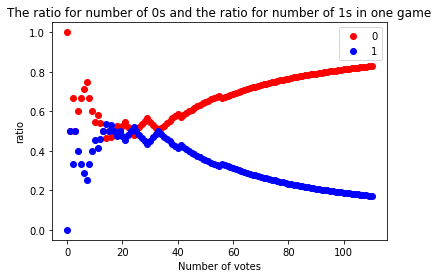

In [7]:
t_vote = 0.5
t_attack = 0.5
error = 0.1
latency = 0.5

boo = beacon.Faction.HonestFaction(74, "Honest", t_vote, error, latency)
poo = beacon.Faction.SmokeFaction(37, "Dishonest", t_attack, error, latency)
plot_game_ratio()


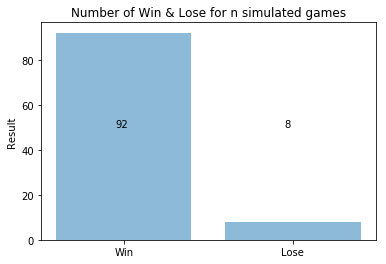

[92, 8]

In [8]:
# for t in t_attack:
#     boo = beacon.Faction.HonestFaction(74, "Honest", 0.5, 0.1, 0.3)
#     poo = beacon.Faction.SmokeFaction(37, "Dishonest", t, 0.1, 0.3)
plot_win_lose(100)


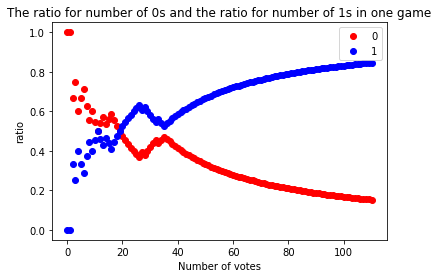

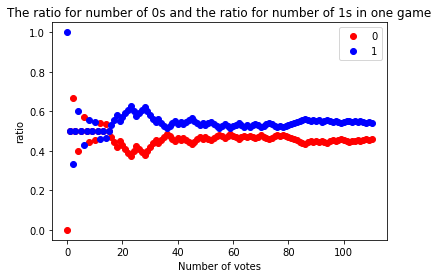

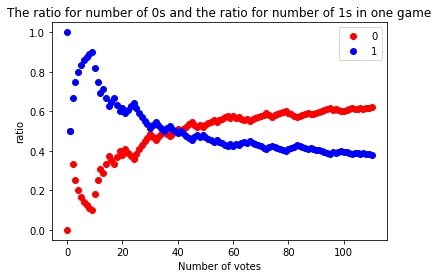

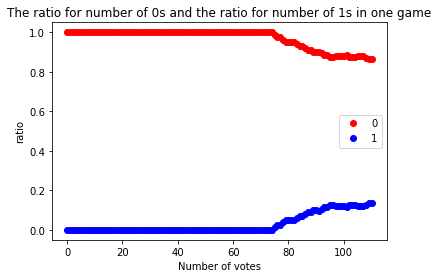

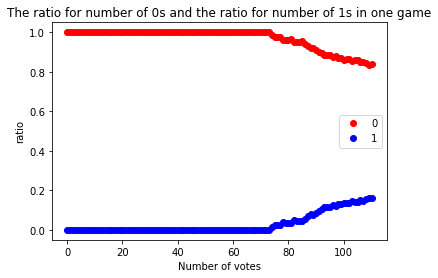

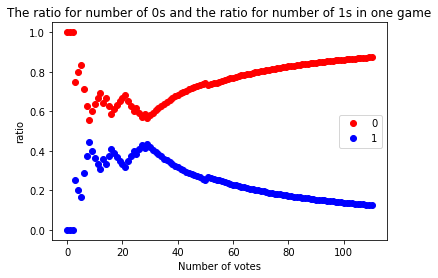

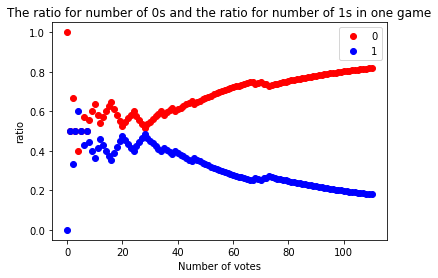

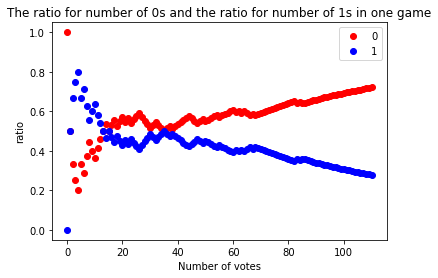

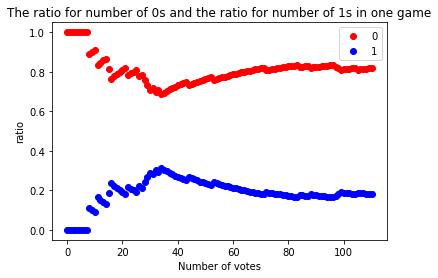

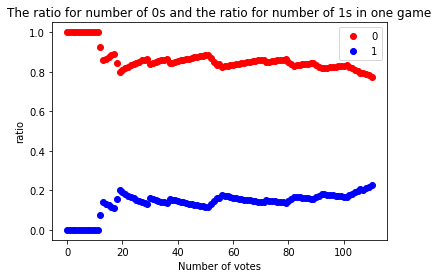

In [10]:
t_vote = 0.5
t_attack = [0.5,0.6,0.7,0.8,0.9]
error = [0, 0.2]
latency = 0.3

for e in error:
        for t in t_attack:
            boo = beacon.Faction.HonestFaction(74, "Honest", t_vote, e, latency)
            poo = beacon.Faction.SmokeFaction(37, "Dishonest", t, e, latency)
            plot_game_ratio()
    

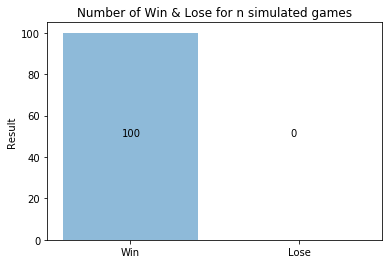

[100, 0]

In [11]:
for t in t_attack:
     boo = beacon.Faction.HonestFaction(74, "Honest", 0.5, 0.1, 0.3)
     poo = beacon.Faction.SmokeFaction(37, "Dishonest", t, 0.1, 0.3)
plot_win_lose(100)